In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from analysis_toolkit import setup_latex, util
from analysis_toolkit import definitions as defs

summary = pd.read_csv('summary.csv', dtype=defs.COLUMNS)
setup_latex()

In [3]:
TESTS_TMP = [d for d in defs.TESTS_P2 if d['p'] == 600]

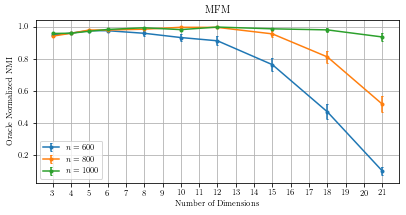

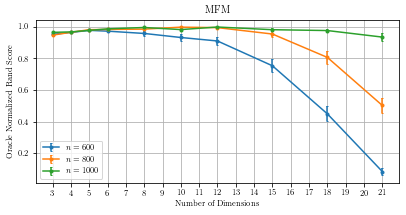

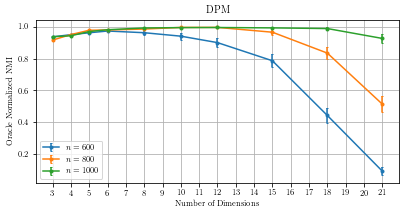

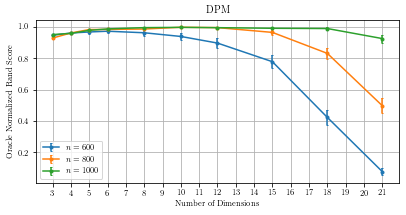

In [4]:
def plot_dim_effect(method, ax, key):

    for p in [600, 800, 1000]:

        tests_filtered = [t for t in defs.TESTS_P2 if t['p'] == p]
        desc = "$n={}$".format(p)

        data = [
            util.oracle_ratio(summary, method=method, key=key, **t)
            for t in tests_filtered
        ]
        mean = [np.mean(d) for d in data]
        sem = [stats.sem(d) for d in data]
        dim = [t['d'] for t in TESTS_TMP]

        ax.errorbar(dim, mean, yerr=sem, fmt='.-', capsize=1, label=desc)

    ax.set_xticks(np.arange(3, 22, 1))
    ax.set_ylabel("Oracle Normalized " + defs.SCORES[key])
    ax.set_xlabel("Number of Dimensions")
    ax.grid()
    ax.legend()


for method, desc in defs.METHODS_P2.items():
    for score in ['nmi', 'rand']:
        fig, ax = plt.subplots(1, 1, figsize=(6.5, 3))
        ax.set_title(desc)
        plot_dim_effect(method, ax, score)
        plt.savefig('./plots/p2_dims/{}_{}.pdf'.format(method, score))
    

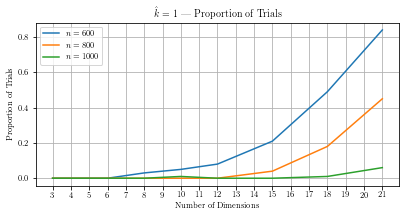

In [5]:
def plot_dim_nc(ax):
    for p in [600, 800, 1000]:

        tests_filtered = [t for t in defs.TESTS_P2 if t['p'] == p]
        desc = "$n={}$".format(p)

        df = [util.filter(summary, method='mfm_hybrid', **t) for t in tests_filtered]
        per = [len(d[d['num_clusters'] == 1]) / 100 for d in df]
        
        dim = [t['d'] for t in tests_filtered]
        ax.plot(dim, per, label=desc)

    ax.set_xticks(np.arange(3, 22, 1))
    ax.set_ylabel("Proportion of Trials")
    ax.set_xlabel("Number of Dimensions")
    ax.grid()
    ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3))
ax.set_title(r"$\hat{k} = 1$ | Proportion of Trials")
plot_dim_nc(ax)
plt.savefig('./plots/p2_dims/num_clusters.pdf')


In [65]:

key = 'rand'

for d in [3, 4, 5, 6, 8, 10, 12, 15, 18, 21]:
    row = [str(d)]
    for n in [600, 800, 1000]:
        for method in ['dpm_hybrid', 'mfm_hybrid']:
            data = util.oracle_ratio(summary, method=method, key=key, p=n, d=d)
            mean = np.mean(data)
            sem = stats.sem(data)
            row.append(r"${:.3f}\pm{:.3f}$".format(mean, 2 * sem))
    print(' & '.join(row) + r' \\')


3 & $0.947\pm0.013$ & $0.953\pm0.013$ & $0.929\pm0.017$ & $0.948\pm0.016$ & $0.951\pm0.012$ & $0.966\pm0.010$ \\
4 & $0.961\pm0.008$ & $0.965\pm0.009$ & $0.961\pm0.009$ & $0.966\pm0.009$ & $0.959\pm0.009$ & $0.969\pm0.008$ \\
5 & $0.968\pm0.022$ & $0.978\pm0.013$ & $0.983\pm0.005$ & $0.983\pm0.008$ & $0.978\pm0.005$ & $0.978\pm0.005$ \\
6 & $0.973\pm0.017$ & $0.973\pm0.016$ & $0.984\pm0.008$ & $0.984\pm0.010$ & $0.987\pm0.003$ & $0.988\pm0.004$ \\
8 & $0.963\pm0.035$ & $0.959\pm0.036$ & $0.987\pm0.012$ & $0.986\pm0.013$ & $0.995\pm0.002$ & $0.997\pm0.001$ \\
10 & $0.939\pm0.045$ & $0.933\pm0.048$ & $0.998\pm0.001$ & $0.999\pm0.001$ & $0.997\pm0.001$ & $0.983\pm0.022$ \\
12 & $0.897\pm0.058$ & $0.911\pm0.055$ & $0.996\pm0.008$ & $0.996\pm0.008$ & $0.995\pm0.008$ & $1.000\pm0.001$ \\
15 & $0.778\pm0.081$ & $0.754\pm0.083$ & $0.965\pm0.035$ & $0.955\pm0.040$ & $0.991\pm0.012$ & $0.983\pm0.017$ \\
18 & $0.423\pm0.094$ & $0.449\pm0.094$ & $0.831\pm0.074$ & $0.807\pm0.077$ & $0.990\pm0.020$ 